# Medical_Insurance
This project involves data wrangling activity for medical insurance dataset.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import ydata_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
#data framing


%matplotlib inline  
#to execute the previous version code if you've updated your tool version.

C:\Users\acer\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\acer\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
C:\Users\acer\AppData\Local\Temp\ipykernel_17448\780492144.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_p

### Import Dataset

In [2]:
data_raw = pd.read_csv('Insurance_Medical.csv')
data_raw.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
5,31.0,female,25.740,0,no,southeast,3756.62160
6,46.0,female,33.440,1,no,southeast,8240.58960
7,37.0,female,27.740,3,no,northwest,7281.50560
8,37.0,male,29.830,2,no,northeast,6406.41070
9,60.0,female,25.840,0,NaN,northwest,28923.13692


In [3]:
data_raw = pd.read_csv('Insurance_Medical.csv')
data_raw.tail()

,age,sex,bmi,children,smoker,region,charges
2772,47.0,female,45.320,1,no,southeast,8569.86180
2773,21.0,female,34.600,0,no,southwest,2020.17700
2774,19.0,male,26.030,1,yes,northwest,16450.89470
2775,23.0,male,18.715,0,no,northwest,21595.38229
2776,54.0,male,31.600,0,no,southwest,9850.43200


### Check total number of attributes/ variables

In [4]:
print("No. of attributes (Columns): ",len(data_raw.columns)) # to get the column 
print("No. of sample (Rows): ",len(data_raw))

No. of attributes (Columns):  7
No. of sample (Rows):  2777


### Descriptive Statistics

In [5]:
data_raw.describe()

,age,bmi,children,charges
count,2776.000000,2773.000000,2777.000000,2777.000000
mean,39.130764,30.689418,1.101188,13270.937423
std,14.088415,6.135823,1.214491,12147.413027
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.200000,0.000000,4718.203550
50%,39.000000,30.400000,1.000000,9361.326800
75%,51.000000,34.770000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


### Interactive and Comprehensive Descriptive Analysis using Pandas-Profiling

In [6]:
# forming ProfileReport and save
# as output.html file
profile = pp.ProfileReport(data_raw)
profile.to_file("medicalinsurance.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Checking and Treating Missing Values

In [7]:
#Identify missing data 
data_raw.isnull().sum()

age         1
sex         6
bmi         4
children    0
smoker      8
region      0
charges     0
dtype: int64

In [8]:
#Find the location of missing values
trace_missing_age = pd.isnull(data_raw['age'])
data_raw[trace_missing_age]

,age,sex,bmi,children,smoker,region,charges
63,NaN,male,27.36,3,no,northeast,8606.2174


In [9]:
#Treat the missing values with median
data_raw.age = data_raw.age.fillna(data_raw.age.median())

In [10]:
trace_missing_sex = pd.isnull(data_raw['sex'])
data_raw[trace_missing_sex]

,age,sex,bmi,children,smoker,region,charges
13,23.0,NaN,34.400,0,no,southwest,1826.84300
20,30.0,NaN,35.300,0,yes,southwest,36837.46700
40,35.0,NaN,36.670,1,yes,northeast,39774.27630
66,28.0,NaN,25.935,1,no,northwest,4133.64165
76,58.0,NaN,32.010,1,no,southeast,11946.62590
103,38.0,NaN,19.300,0,yes,southwest,15820.69900


In [11]:
#Treat the missing values with mode
data_raw.sex = data_raw.sex.fillna(data_raw.sex.mode()[0])

In [12]:
trace_missing_bmi = pd.isnull(data_raw['bmi'])
data_raw[trace_missing_bmi]

,age,sex,bmi,children,smoker,region,charges
32,22.0,male,NaN,0,yes,southwest,35585.57600
113,63.0,male,NaN,0,yes,southeast,47055.53210
126,20.0,female,NaN,0,no,northwest,2257.47525
2156,57.0,female,NaN,0,no,northwest,11842.62375


In [13]:
data_raw.bmi = data_raw.bmi.fillna(data_raw.bmi.median())

In [14]:
trace_missing_smoker = pd.isnull(data_raw['smoker'])
data_raw[trace_missing_smoker]

,age,sex,bmi,children,smoker,region,charges
9,60.0,female,25.840,0,NaN,northwest,28923.13692
10,60.0,female,25.840,0,NaN,northwest,28923.13692
23,18.0,male,34.100,0,NaN,southeast,1137.01100
50,60.0,female,24.530,0,NaN,southeast,12629.89670
91,46.0,female,27.740,0,NaN,northwest,8026.66660
109,20.0,male,28.025,1,NaN,northwest,17560.37975
136,53.0,female,35.900,2,NaN,southwest,11163.56800
480,61.0,male,28.310,1,NaN,northwest,28868.66390


In [15]:
data_raw.smoker = data_raw.smoker.fillna(data_raw.smoker.mode()[0])

In [16]:
# Recheck
data_raw.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
#Reset into new index
data_raw=data_raw.reset_index(drop=True)

### Save new data version (Data Clean)

In [18]:
data_clean=data_raw.copy()
data_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [19]:
data_raw.to_csv("Insurance_Medical_New.csv")

In [20]:
data_clean1=pd.read_csv("Insurance_Medical_New.csv")
data_clean1 = data_clean1.drop(columns=data_clean1.columns[0])

### Checking for mean

In [21]:
#data_clean.mean()
pd.DataFrame(round(data_clean1.mean(),2),columns=['charges'])

C:\Users\acer\AppData\Local\Temp\ipykernel_17448\3757888225.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(round(data_clean1.mean(),2),columns=['charges'])


,charges
age,39.13
bmi,30.69
children,1.10
charges,13270.94


C:\Users\acer\AppData\Local\Temp\ipykernel_17448\2017980489.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean1['charges'])


<Axes: xlabel='charges', ylabel='Density'>

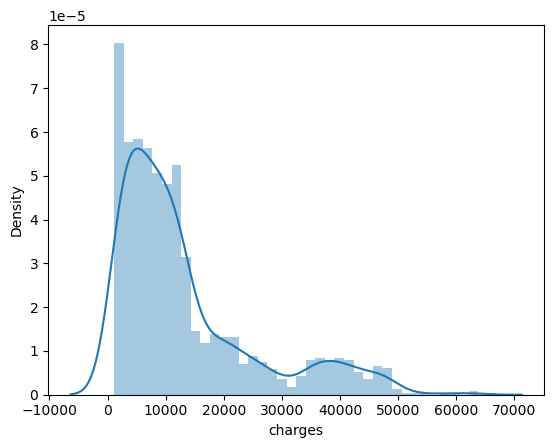

In [22]:
# Plotting Distribution Graph
sns.distplot(data_clean1['charges'])

In [23]:
#Data Exploration
data_clean1.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,2777.000000,2777,2777.000000,2777.000000,2777,2777,2777.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1409,NaN,NaN,2213,766,NaN
mean,39.130717,NaN,30.689001,1.101188,NaN,NaN,13270.937423
std,14.085877,NaN,6.131410,1.214491,NaN,NaN,12147.413027
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4718.203550
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9361.326800
75%,51.000000,NaN,34.770000,2.000000,NaN,NaN,16586.497710


C:\Users\acer\AppData\Local\Temp\ipykernel_17448\3062207013.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean1['age'])


<Axes: xlabel='age', ylabel='Density'>

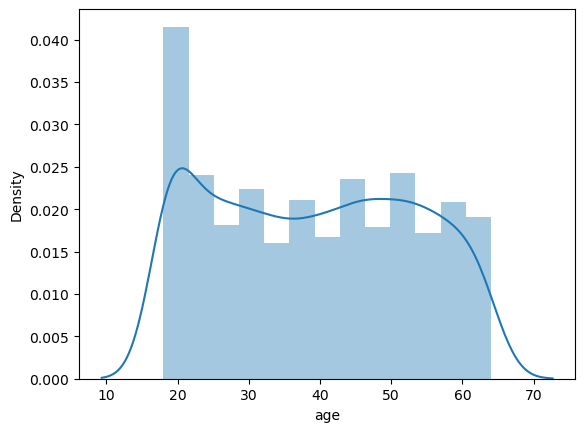

In [24]:
sns.distplot(data_clean1['age'])

### Removing Outliers

In [25]:
#displot has been deprecated, use histplot.


#Removing Outliers using Quantile Method. Get the 99th percentile and keep the data below it
q = data_clean1['charges'].quantile(0.99)
data_clean1 = data_clean1[data_clean1['charges']<q]
data_clean1.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,2749.000000,2749,2749.000000,2749.000000,2749,2749,2749.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1391,NaN,NaN,2213,750,NaN
mean,39.009822,NaN,30.616753,1.104402,NaN,NaN,12862.594262
std,14.052080,NaN,6.106596,1.216552,NaN,NaN,11498.879640
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.180000,0.000000,NaN,NaN,4673.392200
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9264.797000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16069.084750


In [26]:
#Data Exploration
data_clean1.describe(include = 'all')


,age,sex,bmi,children,smoker,region,charges
count,2749.000000,2749,2749.000000,2749.000000,2749,2749,2749.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1391,NaN,NaN,2213,750,NaN
mean,39.009822,NaN,30.616753,1.104402,NaN,NaN,12862.594262
std,14.052080,NaN,6.106596,1.216552,NaN,NaN,11498.879640
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.180000,0.000000,NaN,NaN,4673.392200
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9264.797000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16069.084750


<Axes: xlabel='charges', ylabel='Count'>

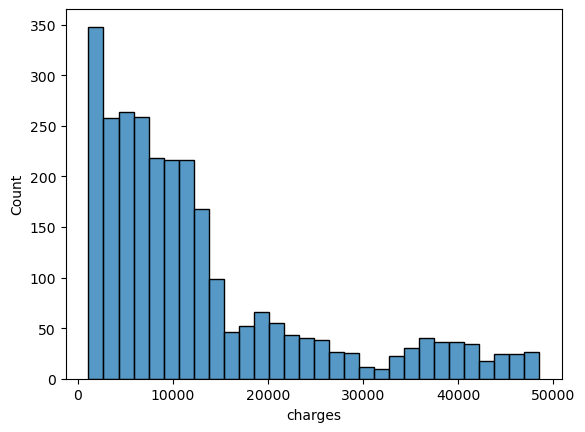

In [27]:
# Plotting Distribution Graph
sns.histplot(data_clean1['charges'])

### Box Plot


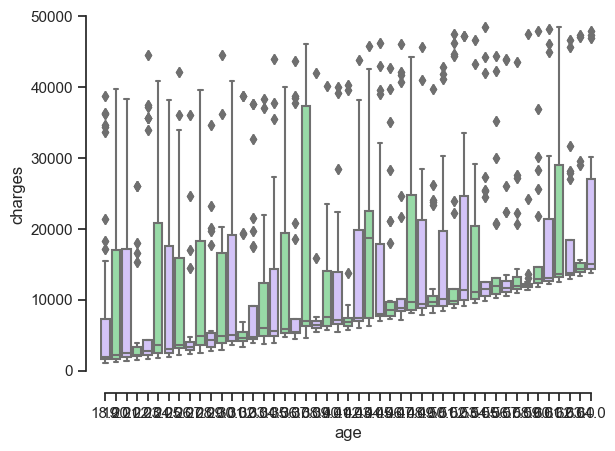

In [28]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="age", y="charges", palette=["m", "g"], width=0.8,
            data=data_clean1)
sns.despine(offset=10, trim=True)

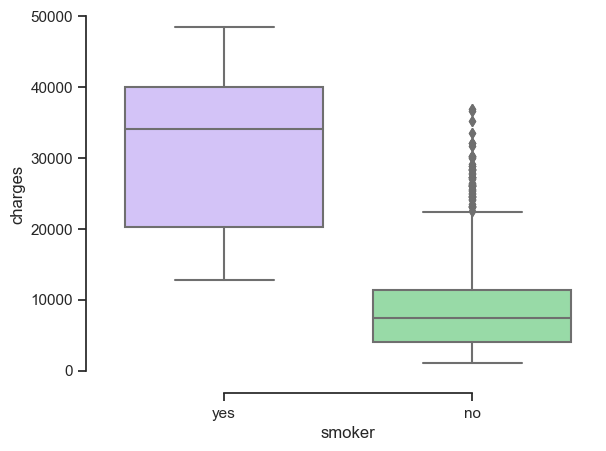

In [29]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="smoker", y="charges", palette=["m", "g"], width=0.8,
            data=data_clean1)
sns.despine(offset=10, trim=True)

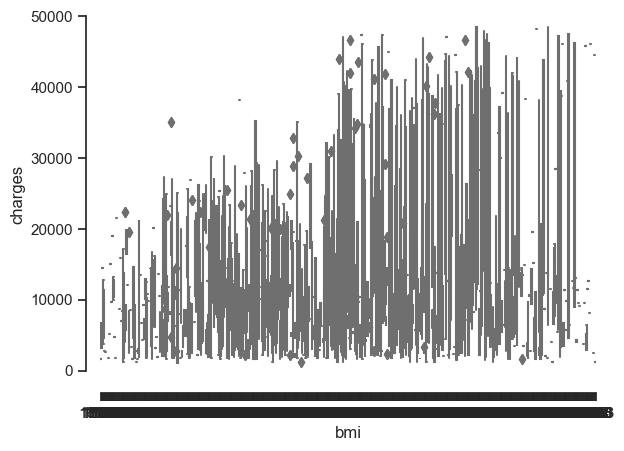

In [30]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="bmi", y="charges", palette=["m", "g"], width=0.8,
            data=data_clean1)
sns.despine(offset=10, trim=True)

# Features Selection

In [31]:
#Check for correlation
#Selection can be based on mathematical parameters and logical relationship.

#Handling Dummy Data

#Create dummy variables for categorical variable
data_with_dummy = pd.get_dummies(data_clean1)
#data_with_dummy = pd.get_dummies(data_clean,drop_first=True)
data_with_dummy.head(20)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31.0,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46.0,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37.0,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37.0,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60.0,25.840,0,28923.13692,1,0,1,0,0,1,0,0


<Axes: >

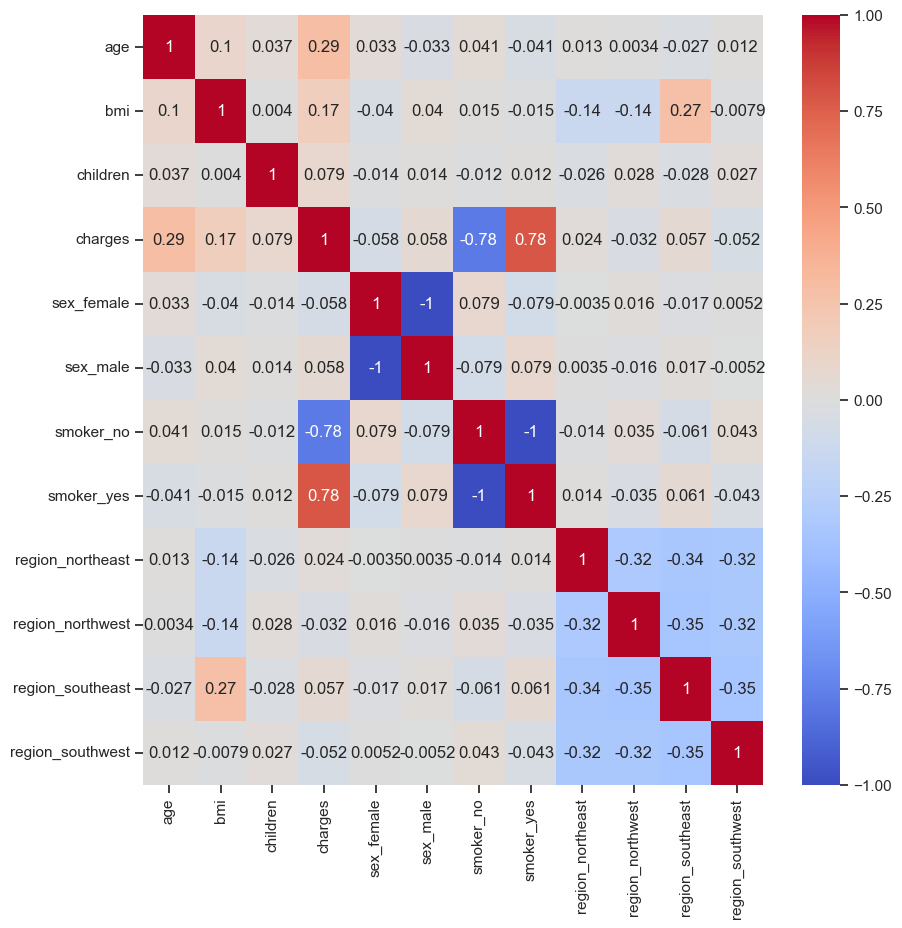

In [32]:
# Correlation 
data_with_dummy.corr()

# Heatmap Correlation
plt.figure(figsize=(10,10))
sns.heatmap(data_with_dummy.corr(), annot=True, cmap='coolwarm')
#Annot is to add the annotation from correlation matrix
#cmap - color map

# To select only features with <-0.2 and >0.2

In [33]:
#choose one diagnosis only since the outcome will be same
data_with_dummy1 = data_with_dummy.loc[:, ~data_with_dummy.corrwith(data_with_dummy['charges']).between(-.2, .2)]
data_with_dummy1
#Since only three of the features are significant (corr< 0.2 and >0.2) from heatmap result, 
#we choose age, charges, and smoker.

,age,charges,smoker_no,smoker_yes
0,19.0,16884.92400,0,1
1,18.0,1725.55230,1,0
2,28.0,4449.46200,1,0
3,33.0,21984.47061,1,0
4,32.0,3866.85520,1,0
...,...,...,...,...
2772,47.0,8569.86180,1,0
2773,21.0,2020.17700,1,0
2774,19.0,16450.89470,0,1
2775,23.0,21595.38229,1,0


In [34]:
print('No of attributes: ', len(data_with_dummy1.columns))
data_with_dummy1.columns

No of attributes:  4


Index(['age', 'charges', 'smoker_no', 'smoker_yes'], dtype='object')

### Plotting charges vs age, charges vs smoker & charges vs bmi

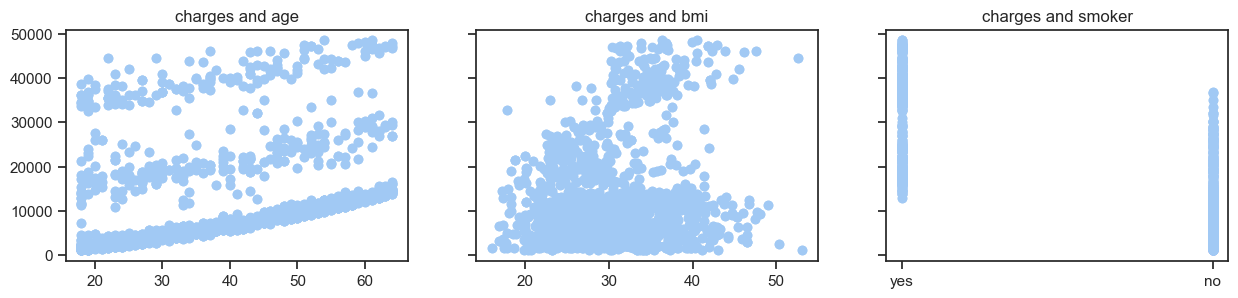

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_clean1['age'],data_clean1['charges'])
ax1.set_title('charges and age')
ax2.scatter(data_clean1['bmi'],data_clean1['charges'])
ax2.set_title('charges and bmi')
ax3.scatter(data_clean1['smoker'],data_clean1['charges'])
ax3.set_title('charges and smoker')

plt.show()

Text(0.5, 1.0, 'Log charges and smoker')

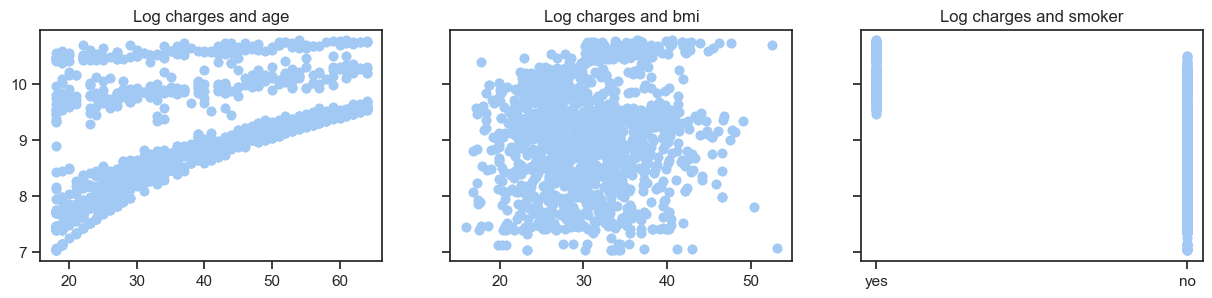

In [36]:
log_price = np.log(data_clean['charges'])
data_clean1['Log_charges']=log_price #Add new transform data point into the dataframe
data_clean1.head()

#Plotting Price vs Age, Price vs KM & Price vs HP
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_clean1['age'],data_clean1['Log_charges'])
ax1.set_title('Log charges and age')
ax2.scatter(data_clean1['bmi'],data_clean1['Log_charges'])
ax2.set_title('Log charges and bmi')
ax3.scatter(data_clean1['smoker'],data_clean1['Log_charges'])
ax3.set_title('Log charges and smoker')

In [37]:
data_clean1["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [38]:
data_clean1["smoker"] = [1 if i == "yes" else 0 for i in data_clean1["smoker"]]
data_clean1

,age,sex,bmi,children,smoker,region,charges,Log_charges
0,19.0,female,27.900,0,1,southwest,16884.92400,9.734176
1,18.0,male,33.770,1,0,southeast,1725.55230,7.453302
2,28.0,male,33.000,3,0,southeast,4449.46200,8.400538
3,33.0,male,22.705,0,0,northwest,21984.47061,9.998092
4,32.0,male,28.880,0,0,northwest,3866.85520,8.260197
...,...,...,...,...,...,...,...,...
2772,47.0,female,45.320,1,0,southeast,8569.86180,9.056007
2773,21.0,female,34.600,0,0,southwest,2020.17700,7.610940
2774,19.0,male,26.030,1,1,northwest,16450.89470,9.708135
2775,23.0,male,18.715,0,0,northwest,21595.38229,9.980235


In [39]:
data_clean1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [40]:
#.factorize encodes an object as a categorical variable
data_clean1['region'] , region_index = pd.factorize(data_clean1['region'])

In [41]:
data_clean1['sex'] , sex_index = pd.factorize(data_clean1['sex'])

### Set the input and output attributes

In [42]:
X = data_clean1.iloc[:, :5].values
y = data_clean1.iloc[:, -1].values
X


array([[19.   ,  0.   , 27.9  ,  0.   ,  1.   ],
       [18.   ,  1.   , 33.77 ,  1.   ,  0.   ],
       [28.   ,  1.   , 33.   ,  3.   ,  0.   ],
       ...,
       [19.   ,  1.   , 26.03 ,  1.   ,  1.   ],
       [23.   ,  1.   , 18.715,  0.   ,  0.   ],
       [54.   ,  1.   , 31.6  ,  0.   ,  0.   ]])

In [43]:
y

array([9.73417643, 7.45330245, 8.40053847, ..., 9.70813514, 9.98023479,
       9.19527059])

### Data Partitioning 

In [44]:
# data partitioning (80:20) Training =80%, Testing =20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #random_state=0, Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls

In [45]:
X_train

array([[23.   ,  1.   , 34.4  ,  0.   ,  0.   ],
       [28.   ,  0.   , 26.51 ,  2.   ,  0.   ],
       [26.   ,  0.   , 34.2  ,  2.   ,  0.   ],
       ...,
       [28.   ,  1.   , 33.82 ,  0.   ,  0.   ],
       [25.   ,  0.   , 20.8  ,  1.   ,  0.   ],
       [55.   ,  0.   , 33.535,  2.   ,  0.   ]])

### Data Modelling 

In [46]:
# Develop Linear Regression model 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred=model.predict(X_test)
y_pred

array([ 8.13049582,  7.99280127,  9.59493319,  9.228538  ,  8.55196851,
        8.16219736,  9.21884519,  9.48229225,  9.4062307 ,  8.83283805,
        9.02002506,  9.62839538,  9.02112992,  8.54865745,  9.39094898,
        8.84021148,  7.97602242,  9.44368787,  7.90044007,  9.62023459,
        9.74611668,  8.53364746,  9.1411964 ,  8.68723093,  8.41493992,
        8.29397568,  8.03212286,  9.03364359,  9.18302255,  8.95463078,
        7.86037886,  7.95833484,  8.93082382,  9.38736822,  8.80218545,
        9.54041487,  8.79496585,  7.80010052,  9.4299597 , 10.51819908,
        8.114352  ,  8.45239246,  8.76649669, 10.86428907,  9.05422562,
        9.72256152,  8.4865981 ,  7.97373947,  9.5652656 , 10.16475401,
        8.96958982, 10.14427104,  8.87691035,  8.57880073,  9.46650624,
        9.21884519,  8.18151324,  9.35490009,  9.34282137,  9.02725325,
        8.37812128,  7.82020922,  9.55105984, 10.57976823,  9.23762233,
        8.00175761,  8.38503588,  8.95285917,  8.06449115,  9.40

In [48]:
import statsmodels.formula.api as sm
result = sm.ols("charges~age+sex+bmi+children+smoker+region", data=data_clean1).fit()

#print result.summary()
print (round(result.rsquared,4), round(result.rsquared_adj,4)) # If you're developing MLR, take rsquared_adj.

0.7422 0.7416


In [49]:
y_test

array([ 7.8797715 ,  7.66419453,  9.58684966,  9.05600689,  8.56741242,
        7.93782417,  9.19783049,  9.47417748, 10.28146095,  8.91209531,
        9.84193898, 10.43139292,  8.99068672,  8.44840194,  9.41177916,
       10.11062563,  9.34859116,  9.5068178 ,  7.38756486, 10.47969567,
        9.71581849,  8.4936924 ,  9.24528667,  8.74040634,  8.20503972,
        8.15603134,  7.72081509,  8.99008458,  9.18240684,  8.91511567,
        7.39790734,  7.8578098 ,  8.87502035,  9.30702912,  8.729769  ,
        9.54551536,  8.80275233,  7.02275569,  9.53564375,  9.99336573,
        8.07293258,  8.13456258,  9.52700864, 10.22317372,  9.10097859,
        9.58813496,  8.58561317,  7.83511202, 10.47969567, 10.52594805,
        9.08559426,  9.86266264,  8.82113648,  8.51796349,  9.91181955,
        9.19783049, 10.0882927 ,  9.89087755,  9.34084793,  9.12628881,
        8.4591834 ,  7.39466669,  9.5382726 , 10.62069702,  9.34609617,
        7.53654739,  8.18631965,  9.01824533,  7.67635857, 10.10

In [50]:
y_pred=model.predict(X_test)
y_pred

array([ 8.13049582,  7.99280127,  9.59493319,  9.228538  ,  8.55196851,
        8.16219736,  9.21884519,  9.48229225,  9.4062307 ,  8.83283805,
        9.02002506,  9.62839538,  9.02112992,  8.54865745,  9.39094898,
        8.84021148,  7.97602242,  9.44368787,  7.90044007,  9.62023459,
        9.74611668,  8.53364746,  9.1411964 ,  8.68723093,  8.41493992,
        8.29397568,  8.03212286,  9.03364359,  9.18302255,  8.95463078,
        7.86037886,  7.95833484,  8.93082382,  9.38736822,  8.80218545,
        9.54041487,  8.79496585,  7.80010052,  9.4299597 , 10.51819908,
        8.114352  ,  8.45239246,  8.76649669, 10.86428907,  9.05422562,
        9.72256152,  8.4865981 ,  7.97373947,  9.5652656 , 10.16475401,
        8.96958982, 10.14427104,  8.87691035,  8.57880073,  9.46650624,
        9.21884519,  8.18151324,  9.35490009,  9.34282137,  9.02725325,
        8.37812128,  7.82020922,  9.55105984, 10.57976823,  9.23762233,
        8.00175761,  8.38503588,  8.95285917,  8.06449115,  9.40

In [51]:
y_pred=model.predict(X_test)
df= pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
file_name = 'predict.csv'
df.to_csv(file_name,index=False)

In [52]:
df

,Actual,Predicted
0,7.879771,8.130496
1,7.664195,7.992801
2,9.586850,9.594933
3,9.056007,9.228538
4,8.567412,8.551969
...,...,...
545,9.224355,9.251976
546,8.695646,8.754480
547,10.256568,9.109459
548,7.423349,8.053688
